# 5.1 기초통계량 및 빈도수 시각화

분석할 데이터를 pandas 패키지를 이용해서 DataFrame 형태로 불러오자.

In [1]:
import pandas as pd

In [ ]:
pd.read_csv("데이터명.csv")

In [ ]:
# 받은 데이터를 python file이 있는 폴더에 같이 저장을 한다. 
pd.read_excel("데이터명.xlsx")
pd.read_csv("데이터명.csv")

# 데이터가 python file이 있는 폴더에 없을때.... 
pd.read_excel("주소명/데이터명.xlsx")

In [3]:
data = pd.read_excel("data.xlsx")

In [7]:
data.head()

,성별,나이,연봉,지역,구매제품
0,m,21,3300,서울,핸드폰케이스
1,f,22,5000,경기,마스크
2,f,25,5200,경기,마스크
3,f,32,2000,서울,핸드폰케이스
4,m,27,1800,부산,마스크


data 10개 미리보기는 다음과 같다.

In [8]:
data.head(10)

,성별,나이,연봉,지역,구매제품
0,m,21,3300,서울,핸드폰케이스
1,f,22,5000,경기,마스크
2,f,25,5200,경기,마스크
3,f,32,2000,서울,핸드폰케이스
4,m,27,1800,부산,마스크
5,m,42,3800,전주,자동차용품
6,f,26,2500,부산,마스크
7,f,28,2400,서울,핸드폰케이스
8,f,27,1900,서울,핸드폰케이스
9,f,24,2700,경기,자동차용품


### 결측값이 있는지 확인해보자. 

(1) 행 기준으로 결측값이 있는지 확인 

In [9]:
data.isnull()

,성별,나이,연봉,지역,구매제품
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
194,False,False,False,False,False
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False


아래코드에서 bool type data인 False 0 ,True 는 1로 계산되는 것을 이용하여

다음과 같이 각 행에 True가 있는지 확인 할 수 있다.

In [10]:
data.isnull().sum(1)

0      0
1      0
2      0
3      0
4      0
      ..
194    0
195    0
196    0
197    0
198    0
Length: 199, dtype: int64

(2) 열(column)기준으로 결측값이 있는지 확인

In [11]:
data.isnull().sum(0)

성별      0
나이      0
연봉      0
지역      0
구매제품    0
dtype: int64

(3) 전체 데이터에서 결측값이 있는지 확인

In [13]:
data.isnull().sum(1).sum()

0

In [16]:
#결측값이 있을대 결측값을 0으로 대체하는 함수 
data.fillna(0)

,성별,나이,연봉,지역,구매제품
0,m,21,3300,서울,핸드폰케이스
1,f,22,5000,경기,마스크
2,f,25,5200,경기,마스크
3,f,32,2000,서울,핸드폰케이스
4,m,27,1800,부산,마스크
...,...,...,...,...,...
194,m,28,3400,경기,노트북
195,f,28,2800,서울,화장품
196,m,27,3500,경기,화장품
197,f,23,1900,경기,노트북


남녀 고객수와 성비를 알아보자.

In [17]:
data.head()

,성별,나이,연봉,지역,구매제품
0,m,21,3300,서울,핸드폰케이스
1,f,22,5000,경기,마스크
2,f,25,5200,경기,마스크
3,f,32,2000,서울,핸드폰케이스
4,m,27,1800,부산,마스크


In [18]:
gender = data["성별"]

In [20]:
gender = data[["성별"]]        #data.iloc[:,0]

In [21]:
gender.head()

,성별
0,m
1,f
2,f
3,f
4,m


In [22]:
gender.value_counts()

성별
m     101
f      98
dtype: int64

In [23]:
male_ratio = gender.value_counts()[0]/ len(data)
female_ratio = gender.value_counts()[1]/ len(data)

print(f"남자비율 : {male_ratio}, 여자비율 : {female_ratio}")

남자비율 : 0.507537688442211, 여자비율 : 0.49246231155778897


고객들의 거주지 비율을 알아보자. 

In [33]:
residence = data["지역"]
residence.value_counts()

서울    90
경기    63
부산    26
제주     6
강원     5
세종     4
울산     3
전주     2
Name: 지역, dtype: int64

In [35]:
se_ratio = residence.value_counts()[0]/ len(data)
gy_ratio = residence.value_counts()[1]/ len(data)
bs_ratio = residence.value_counts()[2]/ len(data)
j_ratio = residence.value_counts()[3]/ len(data)
k_ratio = residence.value_counts()[4]/ len(data)
sj_ratio = residence.value_counts()[5]/ len(data)
ul_ratio = residence.value_counts()[6]/ len(data)
jg_ratio = residence.value_counts()[7]/ len(data)


print(f"서울 : {se_ratio}, 경기 : {gy_ratio}, 부산 : {bs_ratio}, 제주 : {j_ratio} , 강원 : {k_ratio} , 세종 : {sj_ratio} ")

서울 : 0.45226130653266333, 경기 : 0.3165829145728643, 부산 : 0.1306532663316583, 제주 : 0.03015075376884422 , 강원 : 0.02512562814070352 , 세종 : 0.020100502512562814 


구매제품 비율을 알아보자. 

In [36]:
product = data["구매제품"]
product.value_counts()

마스크       50
노트북       49
화장품       38
핸드폰케이스    31
자동차용품     31
Name: 구매제품, dtype: int64

In [37]:
mask_ratio = product.value_counts()[0]/ len(data)
nb_ratio = product.value_counts()[1]/ len(data)
makeup_ratio = product.value_counts()[2]/ len(data)
hpc_ratio = product.value_counts()[3]/ len(data)
car_p_ratio = product.value_counts()[4]/ len(data)

print(f"마스크 : {mask_ratio} \n노트북 : {nb_ratio} \n화장품 : {makeup_ratio} \n핸드폰케이스 : {hpc_ratio} \n자동차용품 : {car_p_ratio} ")

마스크 : 0.25125628140703515 
노트북 : 0.24623115577889448 
화장품 : 0.19095477386934673 
핸드폰케이스 : 0.15577889447236182 
자동차용품 : 0.15577889447236182 


나이와 연봉에 대하여 기초통계량들을 구해보자. 

(1) 평균 구하기

In [38]:
age_ = data[["나이"]]

In [39]:
age_.head()

,나이
0,21
1,22
2,25
3,32
4,27


In [40]:
age_.mean()

나이    26.58794
dtype: float64

(2) 분산 구하기

In [41]:
age_.var()

나이    26.192985
dtype: float64

(3) max값 과 min 값 구하기

In [42]:
age_.max()

나이    42
dtype: int64

In [43]:
age_.min()

나이    15
dtype: int64

(4) 기초통계량들을 한번에 구하기 

In [45]:
data.describe()

,나이,연봉
count,199.000000,199.000000
mean,26.587940,3315.979899
std,5.117908,1503.774013
min,15.000000,30.000000
25%,22.500000,2400.000000
50%,26.000000,3100.000000
75%,30.000000,4000.000000
max,42.000000,9500.000000


5. 왜도 구하기 

In [47]:
data.skew()

C:\Users\ajdma\AppData\Local\Temp/ipykernel_15496/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


나이    0.512678
연봉    0.830328
dtype: float64

왜도가 모두 0에 근접하므로, 정규분포와 비슷하게 대칭이다. 

6. 첨도 구하기

In [49]:
data.kurtosis()

C:\Users\ajdma\AppData\Local\Temp/ipykernel_8220/2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


나이    0.043387
연봉    1.762869
dtype: float64

첨도가 0에 근접하므로, 정규분포의 형태와 비슷함을 알 수 있다. 

이번에는 수치형 자료(나이,연봉)에 대하여 계급화를 진행해보자. 

20살 미만 ->10

20살 이상, 25살 미만 -> 20-25

25살 이상, 30살 미만 -> 25-30

30살 이상, 35살 미만 -> 30-35

35살 이상, 40살 미만 -> 35-40

40살 이상, 45살 미만 -> 40-45 로 계급화를 진행해보자.

아래의 코드는 고객에 대한 계급을 list에 저장하는 코드이다.

In [50]:
age=[]

for i in range(0,len(data)) :   
      
    if data.iloc[i,1] < 20 :
        age.append('10')
    
    elif data.iloc[i,1] <25 and data.iloc[i,1] >= 20 :
        
        age.append('20-25')
        
    elif data.iloc[i,1] < 30 and  data.iloc[i,1] >= 25 : 
        
        age.append('25-30')
    
    elif data.iloc[i,1] <35 and data.iloc[i,1] >=30 :
        
        age.append('30-35')
        
    elif data.iloc[i,1] <40 and data.iloc[i,1] >=35 :
        
        age.append('35-40')
        
    elif data.iloc[i,1] <45 and data.iloc[i,1] >=40 :
        
        age.append('40-45') 

In [51]:
age

['20-25',
 '20-25',
 '25-30',
 '30-35',
 '25-30',
 '40-45',
 '25-30',
 '25-30',
 '25-30',
 '20-25',
 '20-25',
 '20-25',
 '35-40',
 '20-25',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '25-30',
 '30-35',
 '35-40',
 '20-25',
 '20-25',
 '20-25',
 '20-25',
 '20-25',
 '25-30',
 '25-30',
 '25-30',
 '30-35',
 '25-30',
 '30-35',
 '20-25',
 '20-25',
 '20-25',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '25-30',
 '20-25',
 '20-25',
 '20-25',
 '25-30',
 '10',
 '25-30',
 '20-25',
 '25-30',
 '25-30',
 '30-35',
 '30-35',
 '30-35',
 '30-35',
 '30-35',
 '25-30',
 '25-30',
 '25-30',
 '25-30',
 '10',
 '20-25',
 '25-30',
 '20-25',
 '25-30',
 '20-25',
 '20-25',
 '25-30',
 '20-25',
 '20-25',
 '20-25',
 '20-25',
 '25-30',
 '25-30',
 '25-30',
 '10',
 '20-25',
 '25-30',
 '25-30',
 '30-35',
 '30-35',
 '25-30',
 '25-30',
 '35-40',
 '35-40',
 '30-35',
 '20-25',
 '20-25',
 '20-25',
 '20-25',
 '25-30',
 '20-25',
 '25-30',
 '25-30',
 '30-35',
 '20-25',
 '10',
 '25-30',
 '10',
 '25-30',
 '20-25',
 '25-30',
 '25-30',
 '20-

pd.concat 함수를 이용해서, 데이터 프레임을 합치자.

In [54]:
data.head()

,성별,나이,연봉,지역,구매제품
0,m,21,3300,서울,핸드폰케이스
1,f,22,5000,경기,마스크
2,f,25,5200,경기,마스크
3,f,32,2000,서울,핸드폰케이스
4,m,27,1800,부산,마스크


In [55]:
data_new=pd.concat([data,pd.DataFrame(age)],axis=1)

In [56]:
data_new.head()

,성별,나이,연봉,지역,구매제품,0
0,m,21,3300,서울,핸드폰케이스,20-25
1,f,22,5000,경기,마스크,20-25
2,f,25,5200,경기,마스크,25-30
3,f,32,2000,서울,핸드폰케이스,30-35
4,m,27,1800,부산,마스크,25-30


이번에는 시각화를 이용해서 분석결과들을 표현해보자.

matploblib 이라는 패키지를 다음과 같이 이용한다.

In [57]:
import matplotlib.pyplot as plt

1. 성별에 대한 막대그래프 

In [65]:
gender_data = data_new.iloc[:,0].value_counts()
gender_data_index = gender_data.index
gender_data_value = gender_data.values

In [66]:
gender_data_index

Index(['m', 'f'], dtype='object')

In [67]:
gender_data_value

array([101,  98], dtype=int64)

<BarContainer object of 2 artists>

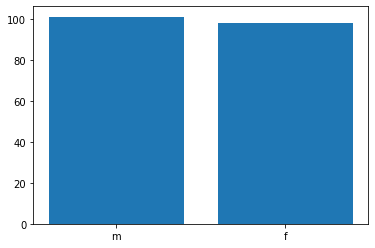

In [71]:
plt.bar(gender_data_index,gender_data_value )

2. 연령대에 대한 막대그래프 

In [72]:
age_data = data_new.iloc[:,5].value_counts()
age_data_index = age_data.index
age_data_value = age_data.values

In [73]:
age_data_index

Index(['25-30', '20-25', '30-35', '35-40', '10', '40-45'], dtype='object')

In [74]:
age_data_value

array([72, 67, 34, 15,  9,  2], dtype=int64)

<BarContainer object of 6 artists>

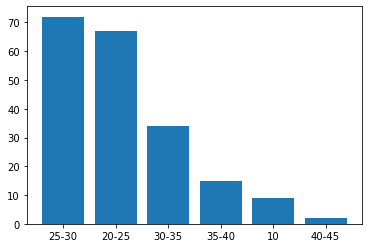

In [75]:
plt.bar(age_data_index,age_data_value)

3. 연령대에 대한 원그래프

<AxesSubplot:ylabel='0'>

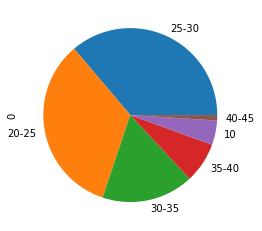

In [40]:
age_data.plot(kind="pie")

([<matplotlib.patches.Wedge at 0x2ad812a7a60>,
 [Text(0.46269306054468706, 0.9979554758223389, ''),
  Text(-1.0803202486903694, -0.2071428499117907, ''),
  Text(0.2326647558157923, -1.0751126040565138, ''),
  Text(0.9176203832862346, -0.6066076426963513, ''),
  Text(1.0769156298836113, -0.22417119822221762, ''),
  Text(1.099451748660139, -0.0347253850686049, '')])

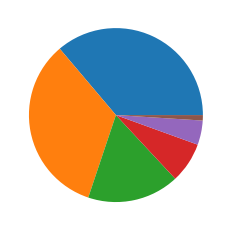

In [78]:
plt.pie(age_data)

3. 지역에 대한 막대그래프 

In [79]:
location_data = data_new.iloc[:,3].value_counts()
location_data_index = location_data.index
location_data_value = location_data.values

<BarContainer object of 8 artists>

C:\Users\ajdma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ajdma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ajdma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ajdma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ajdma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ajdma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from c

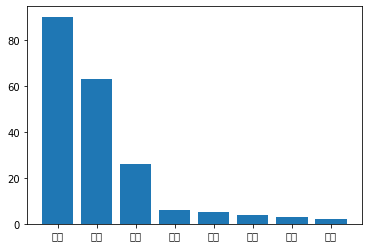

In [80]:
plt.bar(location_data_index,location_data_value)

위와 같은 현상이 발생한 이유은 x축 Data들이 "한글"이기 때문이다.

만약, 한글로된 x축 data들을 그래프에 표현하고 싶다면 추가적인 글자체를 다운로드 후 패키지를 이용해야 한다.

# 5.2 이변량 데이터 분석

In [81]:
data.head()

,성별,나이,연봉,지역,구매제품
0,m,21,3300,서울,핸드폰케이스
1,f,22,5000,경기,마스크
2,f,25,5200,경기,마스크
3,f,32,2000,서울,핸드폰케이스
4,m,27,1800,부산,마스크


나이와 연봉에 대한 피어슨의 상관계수를 구해보자. 

In [82]:
data.corr(method="pearson")          #method = pearson, spearman 

,나이,연봉
나이,1.000000,0.396301
연봉,0.396301,1.000000


상관계수가 0.39 이므로 상관관계가 크다고 할 수는 없다. 

나이와 연봉에 대한 산점도를 그려보자. 

In [83]:
data_age = data["나이"].values
data_salary = data["연봉"].values

Text(0, 0.5, 'salary')

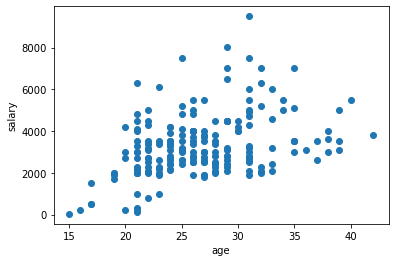

In [85]:
plt.scatter(data_age,data_salary)
plt.xlabel("age")
plt.ylabel("salary")

# 5.3 이상치 처리 

이상치(outlier)는 다른 데이터들에 비하여 멀리 떨어진 데이터를 의미한다.

이상치를 제거할때 좋은 경우도 있지만, 제거하지 않아야 되는 상황도 있다. 

일반적인 상황에서는 제거하는게 좋다. 

1. 연봉에 대한 Boxplot을 그려보자. 

In [88]:
data_salary = data["연봉"].values

Text(0.5, 0, 'salary')

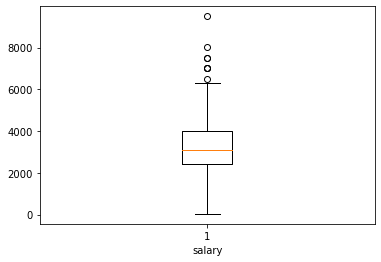

In [89]:
plt.boxplot(data_salary)
plt.xlabel("salary")

2. 나이에 대한 Boxplot을 그려보자. 

Text(0.5, 0, 'age')

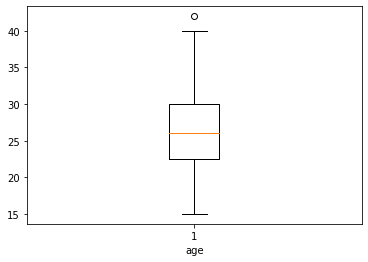

In [90]:
data_age = data["나이"].values
plt.boxplot(data_age)
plt.xlabel("age")

IQR 값을 이용해서 연봉에서의 이상치를 찾아보자. 

In [91]:
data_salary = data["연봉"]

In [94]:
Q1 = data_salary.quantile(0.25)
Q3 = data_salary.quantile(0.75)

IQR_value = Q3-Q1

In [95]:
IQR_value

1600.0

IQR_value 의 1.5배 보다 작은 데이터와 큰 데이터를 제거하자. 

In [100]:
data_salary_new = data_salary[(data_salary > Q1 -IQR_value*1.5 ) & (data_salary < Q3+IQR_value*1.5 )]

<AxesSubplot:>

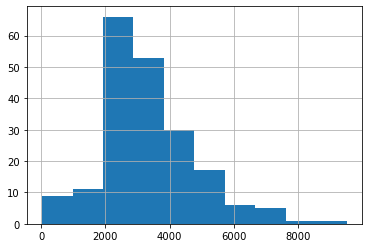

In [101]:
data_salary.hist()

<AxesSubplot:>

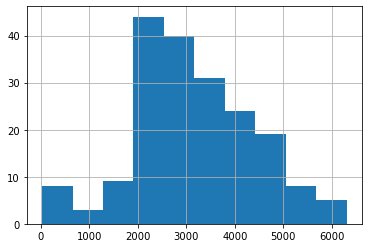

In [102]:
data_salary_new.hist()